# データサイエンス基礎：課題4

## データの読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# student-por.csvの読み込み
student_data_por = pd.read_csv('./student/student-por.csv', sep=';')

# データの確認
student_data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## 1. 統計量の算出

`absences`（欠席数）の以下の統計量を計算，表示する．

- データ数
- 平均
- 中央値
- 最頻値
- 分散
- 標準偏差
- 25, 50, 75パーセンタイル値
- 変動係数

In [2]:
absences = student_data_por['absences']

data_count = len(absences)
mean_value = absences.mean()
median_value = absences.median()
mode_value = absences.mode()[0]
variance = absences.var(ddof=0) 
std_deviation = absences.std(ddof=0) 
percentile_25 = absences.quantile(0.25)
percentile_50 = absences.quantile(0.50)
percentile_75 = absences.quantile(0.75)
cv = std_deviation / mean_value 

print(f"データ数: {data_count}")
print(f"平均: {mean_value}")
print(f"中央値: {median_value}")
print(f"最頻値: {mode_value}")
print(f"分散: {variance}")
print(f"標準偏差: {std_deviation}")
print(f"25パーセンタイル値: {percentile_25}")
print(f"50パーセンタイル値: {percentile_50}")
print(f"75パーセンタイル値: {percentile_75}")
print(f"変動係数: {cv}")

データ数: 649
平均: 3.6594761171032357
中央値: 2.0
最頻値: 0
分散: 21.503457968998173
標準偏差: 4.637182115142576
25パーセンタイル値: 0.0
50パーセンタイル値: 2.0
75パーセンタイル値: 6.0
変動係数: 1.2671710285168554


### 補足: describe()メソッドによる要約統計量

In [ ]:
# describeメソッドでも同様の結果になる
absences.describe()

count    649.000000
mean       3.659476
std        4.640759
min        0.000000
25%        0.000000
50%        2.000000
75%        6.000000
max       32.000000
Name: absences, dtype: float64

## 2. 箱ひげ図・散布図の作成

### 2.1 箱ひげ図

整数型（int64）の変数 `G3`（最終成績）を選び，箱ひげ図を表示する．

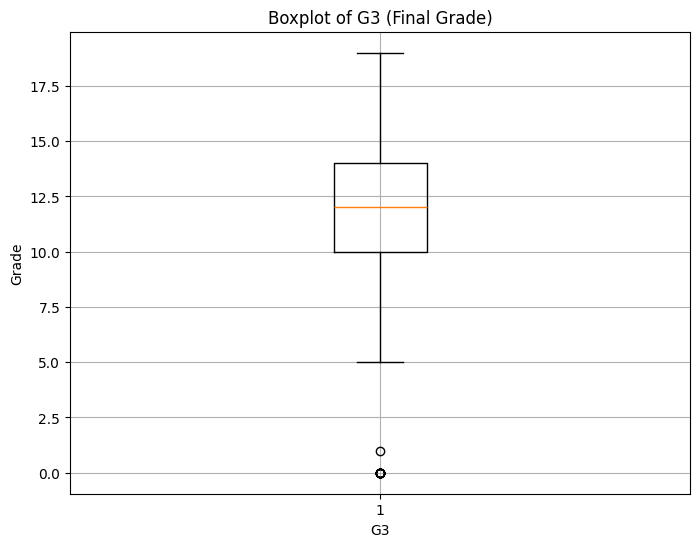

In [4]:
plt.figure(figsize=(8, 6))
plt.boxplot(student_data_por['G3'])
plt.title('Boxplot of G3 (Final Grade)')
plt.ylabel('Grade')
plt.xlabel('G3')
plt.grid(True)
plt.show()

### 2.2 散布図

整数型（int64）の変数 `G1`（1学期の成績）と `G3`（最終成績）を選び，散布図を表示する．

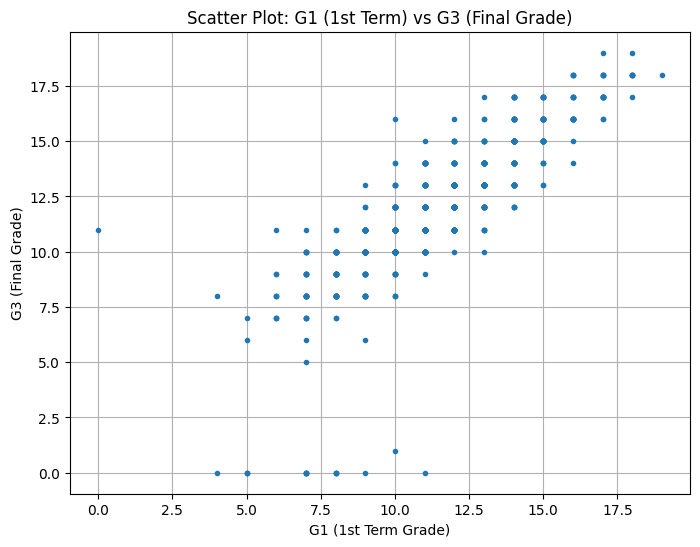

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(student_data_por['G1'], student_data_por['G3'], '.')
plt.title('Scatter Plot: G1 (1st Term) vs G3 (Final Grade)')
plt.xlabel('G1 (1st Term Grade)')
plt.ylabel('G3 (Final Grade)')
plt.grid(True)
plt.show()

## 3. 共分散・相関係数の計算

整数型（int64）の変数 `G1`（1学期の成績）と `G3`（最終成績）を選び，共分散行列と相関係数行列を計算・表示する．

### 3.1 共分散行列

In [7]:
cov_matrix = np.cov(student_data_por['G1'], student_data_por['G3'])

print(cov_matrix)
print()
print(f"G1の分散: {cov_matrix[0, 0]}")
print(f"G3の分散: {cov_matrix[1, 1]}")
print(f"G1とG3の共分散: {cov_matrix[0, 1]}")

[[ 7.53648063  7.32923396]
 [ 7.32923396 10.43713976]]

G1の分散: 7.536480625463677
G3の分散: 10.437139759173656
G1とG3の共分散: 7.3292339591774605


### 3.2 相関係数行列

In [8]:
corr_matrix = np.corrcoef(student_data_por['G1'], student_data_por['G3'])

print(corr_matrix)
print()
print(f"G1とG3の相関係数: {corr_matrix[0, 1]}")

[[1.         0.82638712]
 [0.82638712 1.        ]]

G1とG3の相関係数: 0.8263871247890471
